This one differs from the previous ones.

It plots based on tags parameters

In [2]:
from io import StringIO
from copy import copy

import numpy as np
import pandas as pd

from cycler import cycler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# prepare a colorblind-friendly scheme

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

markers_for_cb = ['', '', '',
                  '.', 'v', '^',
                  's', 'x', '+']

linestyles_cb = ['-', '--', '-.',
                 '-', '--', '-.',
                 '-', '--', '-.']

linestyle_dict = {
     'loosely dotted':        (0, (1, 10)),
     'densely dotted':        (0, (1, 1)),
     'loosely dashed':        (0, (5, 10)),
     'densely dashed':        (0, (5, 1)),
     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),
     'dashdotdotted':       (0, (3, 5, 1, 5, 1, 5)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))
}


prop_cycle = cycler('color', CB_color_cycle) + cycler('marker', markers_for_cb) + cycler('linestyle', linestyles_cb)
plt.rc('axes', prop_cycle=prop_cycle)


def plot(dataframes, labels, value_name, title, initial=None, from_scratch=None, ylim=None, xlim=None, xaxis=None, xaxis_name=None, no_time=False, legend_loc='lower right',
        xticks=None, figsize=(6,4)):

    fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

    if ylim:
        plt.ylim(ylim)

    if initial is not None:
        plt.hlines(initial, 0, 1, linestyle=linestyle_dict['densely dotted'], label='no finetuning', linewidth=3)

    if from_scratch is not None:
        plt.hlines(from_scratch, 0, 1, color='r', linestyle=linestyle_dict['densely dotted'], label='full retraining', linewidth=2)

    # main loop
    for df, label in zip(dataframes, labels):
        values = df[value_name]
        s = 1
        if 'degradation' in value_name:
            s = -1

        _xaxis = df[xaxis] if xaxis is not None else df.old_data_amount  
        ax.plot(_xaxis, s * df[value_name], label=label)
        
        std_name = f'{value_name}_std'
        if std_name in df:
            low = df[value_name] - df[std_name]
            high = df[value_name] + df[std_name]
            ax.fill_between(_xaxis, low, high, alpha=0.15)

    if not no_time:
        # set background colors
        green = "#0F9D58"
        yellow = "#F4B400"
        red = "#DB4437"
#         for i, c in zip(range(0, 10, 1), [green, green, yellow, yellow, yellow, red, red, red, red, red]):
        for i, c in zip(range(0, 10, 1), [green, yellow, red, red, red, red, red, red, red, red]):
            s = i / 10.
            e = (i + 1) / 10.
            ax.axvspan(s, e, ymax=1, facecolor=c, alpha=0.04)

        secax = ax.secondary_xaxis('top')
        secax.set_xlabel('Relative training steps')

        if xticks is not None:
            secax.set_xticks(list(xticks.keys()))
            secax.set_xticklabels(list(xticks.values()))

        else:
            raise ValueError()

        plt.xlabel(xaxis_name or 'Old data amount')

    else:
        plt.xlabel(xaxis_name or 'Old data amount')

#     plt.yscale('log')
    plt.xlim(xlim or (0, 1))
    plt.ylabel(title)
    if legend_loc is not None:
        plt.legend(loc=legend_loc) #, bbox_to_anchor=(1.05, 1))

    ax.grid()
#     plt.title(title)
    plt.show()

    
def split_dataframe_by_tag(dataframe):
    all_tags = list(dataframe.tags.unique())
    
    masks = [dataframe.tags == t for t in all_tags]
    dataframes = [dataframe[m] for m in masks]
    labels = all_tags
    
    return dataframes, labels


# NAME_EVENT 95

In [449]:
# report: https://app.wandb.ai/guitaricet/new_semantic_parsing/reports/Finetuning-Aug-14---VmlldzoyMDc0MDY

name_event_95_csv = '''
"Name","old_data_amount","cls/eval_NAME_EVENT_tree_path_f1","tags","_wandb","eval_exact_match","eval_exact_match_std","relative_degradation","cls/eval_NAME_EVENT_tree_path_f1_std","n_negative_outliers"
"fast-plant-5305 (replay)","1","0.8412721823863281","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8128641456582633","0.001757633330833401","-0.00014930820152600727","0.020732334771712","3"
"upbeat-forest-5299 (replay)","0.7","0.8457807221815473","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8135361005388703","0.0023014102174558747","-0.0001715021372512203","0.015504811041972877","3"
"stoic-frost-5296 (replay)","0.5","0.822309921438211","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8166738578839607","0.0013120649326057306","-0.0002623707678757253","0.015292791006940688","5"
"cosmic-pond-5293 (replay)","0.2","0.8131191332752815","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8160015261710065","0.0016667226289588802","-0.00020359786639939949","0.01658547804971953","4"
"magic-totem-5289 (replay)","0.1","0.8021533387331342","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8130879526698571","0.0022096012078564264","-0.00010535971289194383","0.01583809064920954","2"
"iconic-totem-5286 (replay)","0.05","0.6872387821129701","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.8043476089987565","0.0013753547102788072","-0.0007586880619150608","0.016729253052198793","6"
"young-elevator-5284 (replay)","0","0.4525398288937148","[""finetune"",""name_event_95_Jan9_replay"",""ewc_""]","","0.7498882064036377","0.002248849166724591","-0.020557234895424468","0.015132764437887272","26"
"true-cosmos-5501 (sample)","1","0.8185962037315286","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8097266709374333","0.002456343885722285","-0.00026543635187774143","0.014560467197004136","4"
"zesty-terrain-5498 (sample)","0.7","0.811264527652803","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8135364773712176","0.0019177293367852713","-0.00022834506734979967","0.008470782022086773","4"
"avid-firefly-5494 (sample)","0.5","0.8194826734888648","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8133123877353633","0.001660762005092541","-0.0003113894313532751","0.008799729418072924","4"
"devoted-field-5491 (sample)","0.2","0.7416096353275569","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8110713343633418","0.0011169795011635338","-0.0001298118825257022","0.005953174697136875","2"
"polished-sky-5487 (sample)","0.1","0.7444433870511478","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8092785858738114","0.001433937697973903","-0.00013213958366553108","0.009172117027928065","4"
"youthful-dust-5485 (sample)","0.05","0.7129392430400889","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.8018825601989675","0.002084030311798862","-0.0008161921120161633","0.008213885794166324","9"
"neat-violet-5483 (sample)","0","0.4977527308633616","[""finetune"",""name_event_95_Jan9_sample_fixed""]","","0.7597490924620969","0.001471250675593955","-0.017666526823095826","0.016447523701335637","26"
"firm-dew-5466 (ewc + replay)","1","0.8277832256227459","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.8110711145444724","0.002624150447306187","-0.00013508947244774368","0.021200043322248917","3"
"fiery-hill-5464 (ewc + replay)","0.7","0.8284737483099018","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.8103987828315183","0.0013382384781729676","-0.00022847159328709255","0.009585316602309695","2"
"devoted-bush-5461 (ewc + replay)","0.5","0.820856341743827","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.8157775621459346","0.0008842790078681728","-0.00004406756607077897","0.011020106718296964","1"
"glorious-donkey-5459 (ewc + replay)","0.2","0.7835835914920902","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.812864082852872","0.0010947322014204014","-0.000107993693929856","0.015499916504658606","2"
"flowing-silence-5455 (ewc + replay)","0.1","0.7999123511726038","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.8130882352941177","0.0007748782181301404","-0.00004731238433581107","0.01463117839867118","1"
"ancient-breeze-5453 (ewc + replay)","0.05","0.7120047733199846","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.8061407029179385","0.0009110975056332564","0","0.011349635053392804","0"
"brisk-field-5450 (ewc + replay)","0","0.6176987050820033","[""finetune"",""name_event_95_Jan9_ewc_replay"",""ewc_100""]","","0.7852981685947922","0.0018429501042617064","-0.006895783400728236","0.02233234213602339","11"
"proud-dawn-5545 (ewc + sample)","1","0.8227157776598633","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.809950415143636","0.002302862358082754","-0.00012489624140802713","0.02648155369015109","3"
"frosty-music-5538 (ewc + sample)","0.7","0.8204657288150049","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.812640056022409","0.001308231210943231","-0.00012355825882916108","0.015044355361766312","3"
"easy-dust-5531 (ewc + sample)","0.5","0.8224096821963907","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.8124159035811633","0.0007126780685130289","-0.0003814672252113086","0.013394242255974692","4"
"copper-cloud-5525 (ewc + sample)","0.2","0.7873087844290316","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.8133125133461456","0.0012700130668670212","-0.00010567714993423037","0.01146247085842987","2"
"ethereal-haze-5517 (ewc + sample)","0.1","0.7833852283527171","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.812191813945309","0.0014596203991140903","0","0.007891180037568158","0"
"lilac-silence-5511 (ewc + sample)","0.05","0.7327509987615739","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.8027789187423849","0.0013287084415166618","-0.0001832352321670503","0.01012914570991351","1"
"twilight-planet-5506 (ewc + sample)","0","0.6246222995159874","[""finetune"",""name_event_95_Jan9_ewc_sample_fixed"",""ewc_100""]","","0.7850738905427642","0.00176493013395661","-0.005866600078412714","0.02462734649285407","11"
"avid-sun-5597 (Run set 5)","1","0.824936740243408","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.8146568313424025","0.0023887571983047832","-0.00015291622908220065","0.025080969173474063","4"
"comfy-shadow-5588 (Run set 5)","1","0.8260019192474285","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.8148810151863437","0.0022809719264989497","-0.0003206231774046256","0.024580988958814203","5"
"chocolate-sky-5586 (Run set 5)","0.7","0.8337018012216639","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.8144328673173306","0.0006861245553924813","-0.0004110702475788617","0.013952184135959588","8"
"swept-firebrand-5581 (Run set 5)","0.7","0.8470451426748425","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.814208620667998","0.0015382240783243146","-0.00023154367083350896","0.015401762447603011","5"
"cerulean-firefly-5577 (Run set 5)","0.5","0.8237351806396467","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.8128638944366985","0.0014224944848755352","-0.00018415794221703704","0.011759489366726269","2"
"dainty-yogurt-5574 (Run set 5)","0.5","0.8200791502223381","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.809053930989436","0.0014533570151850088","-0.00025080574515607703","0.01169435926157087","3"
"deft-firefly-5570 (Run set 5)","0.2","0.7691243268109926","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.814432835914635","0.0011395535989403166","-0.00017310476889277078","0.012647099530706193","4"
"absurd-sun-5567 (Run set 5)","0.2","0.7542016954612236","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.8115194194269636","0.0012810606736607423","-0.00010617304264609097","0.013731703960958162","2"
"atomic-wildflower-5564 (Run set 5)","0.1","0.7722055327555404","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.8121914685156574","0.0018503768870424492","-0.000015408957538346006","0.014903896877113864","1"
"lucky-sea-5561 (Run set 5)","0.1","0.7633521222351211","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.8110709889336901","0.0020350182867649932","-0.000051759141012340846","0.01427472840217834","2"
"young-gorge-5558 (Run set 5)","0.05","0.7167367744663788","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.8016582193415482","0.0016320679159590374","0","0.01112725405678316","0"
"lucky-hill-5554 (Run set 5)","0.05","0.7134465769053543","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.8041237077790757","0.001038804795096439","0","0.013614584271200271","0"
"eager-sound-5553 (Run set 5)","0","0.5395535855294271","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.1""]","","0.7727475160467774","0.001292400271175161","-0.01230381493979899","0.02029378985316411","18"
"solar-cloud-5552 (Run set 5)","0","0.5129922363484942","[""finetune"",""name_event_95_Jan9_move_norm"",""move_norm_0.05""]","","0.7675929205763022","0.0011454669225642443","-0.015228849154107675","0.01945602675265103","22"
'''

In [450]:
dataframe.tags.unique()

array(['["finetune","served_dish_90_Jan14_ewc_sample","ewc_100"]',
       '["finetune","served_dish_90_Jan14_sample"]',
       '["finetune","served_dish_90_Jan14_replay"]',
       '["finetune","served_dish_90_Jan14_move_norm","move_norm_0.05"]',
       '["finetune","served_dish_90_Jan14_move_norm","move_norm_0.1"]',
       '["finetune","served_dish_90_Jan14_ewc_replay","ewc_100"]'],
      dtype=object)

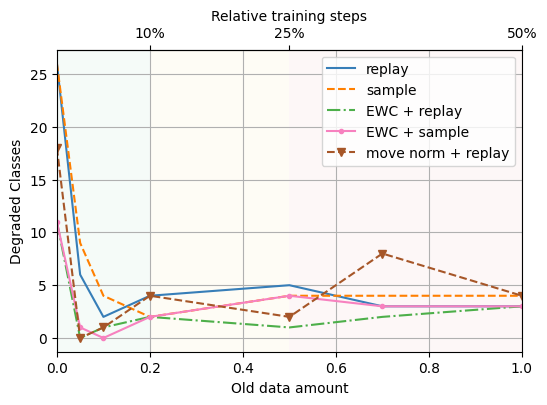

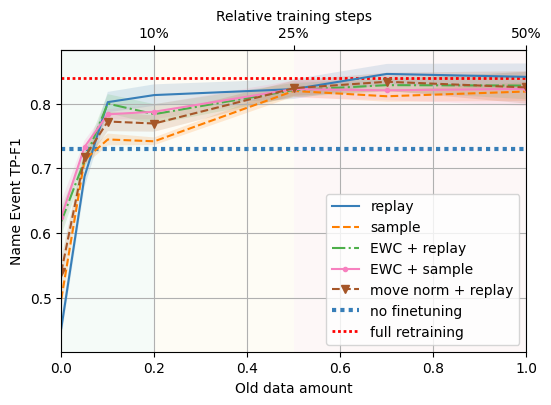

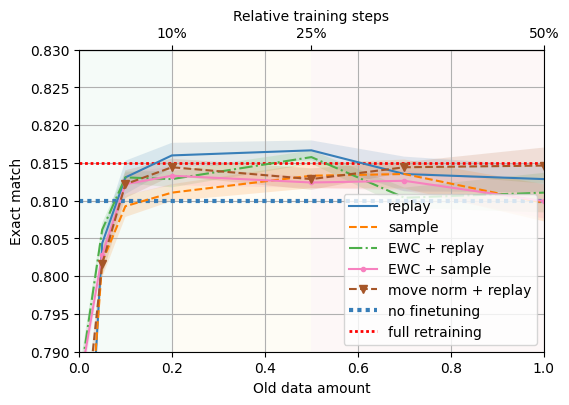

In [451]:
dataframe = pd.read_csv(StringIO(name_event_95_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)


_tag = '["finetune","name_event_95_Jan9_replay","ewc_"]'
replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","name_event_95_Jan9_sample_fixed"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","name_event_95_Jan9_ewc_sample_fixed","ewc_100"]'
ewc_10_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","name_event_95_Jan9_ewc_replay","ewc_100"]'
ewc_10_replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","name_event_95_Jan9_move_norm","move_norm_0.1"]'
move_norm_replay = dataframe[dataframe.tags == _tag]


dataframes = [replay, sample, ewc_10_replay, ewc_10_sample, move_norm_replay]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay"]


xticks = {0.2: '10%', 0.5: '25%', 1.0: '50%'}


# plot(dataframes, labels, "relative_degradation", "Name Event RD", legend_loc='best', ylim=(-0.0002, 0.004), xticks=xticks)
plot(dataframes, labels, "n_negative_outliers", "Degraded Classes", legend_loc='best', xticks=xticks)
plot(dataframes, labels, "cls/eval_NAME_EVENT_tree_path_f1", "Name Event TP-F1", initial=0.73, from_scratch=0.84, xticks=xticks)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=0.81, from_scratch=0.815, ylim=(0.79, 0.83), xticks=xticks)

# Path 99

In [452]:
path_99_csv = '''
"Name","old_data_amount","cls/eval_PATH_tree_path_f1","tags","_wandb","absolute_degradation_0.0","eval_exact_match","n_negative_outliers","cls/eval_PATH_tree_path_f1_std","eval_exact_match_std","relative_degradation"
"worldly-spaceship-5298 (replay)","1","0.6226104856570404","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-0.5126","0.8151052304329804","1","0.020789726128707973","0.002493910737286975","-0.000043078239438810226"
"daily-mountain-5288 (replay)","0.7","0.5943029366519864","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-0.6226","0.8112954239991961","1","0.02091982621787665","0.00352564854299258","-0.00010558598574076463"
"swept-microwave-5279 (replay)","0.5","0.606525519442526","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-1.6102","0.8119679755310196","5","0.022042463847449477","0.0039471268940108935","-0.0002828865836715607"
"misunderstood-durian-5273 (replay)","0.3","0.5807837428705164","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-1.6723","0.8117439172978609","3","0.026716851804034342","0.003549117177890684","-0.00018142858696644832"
"smart-cherry-5267 (replay)","0.2","0.5767148860006334","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-1.792","0.8065894788408638","5","0.017982939525643914","0.003939379839402446","-0.00025344259887812487"
"sandy-lion-5261 (replay)","0.15","0.5725552612539163","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-1.5726","0.8047959452839433","7","0.016926085490580986","0.0036894794593826546","-0.0006198973801673855"
"divine-dragon-5258 (replay)","0.1","0.5660623465965756","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-2.0495","0.8070375325017899","7","0.019868073186274045","0.0037553960238952337","-0.0005285352704728749"
"confused-dream-5251 (replay)","0.05","0.5314932791767237","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-1.4165","0.8003140583587696","3","0.0264519354394135","0.004034392787595265","-0.0002117852157294006"
"pious-hill-5248 (replay)","0.01","0.4689473216804413","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-2.2002","0.7839535365715793","19","0.02149239839561143","0.004136719141198806","-0.004720116273950044"
"unique-sun-5245 (replay)","0","0.29508520867423804","[""finetune"",""path_99_Jan8_bert_run_ewc_find"",""ewc_0""]","","-3.1202","0.7153743829370314","28","0.008943274585465682","0.001593043840943266","-0.026097771192560276"
"proud-blaze-5499 (sample)","1","0.6478571506349948","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.3751","0.8137604099935938","4","0.02158830377524919","0.002580492518696353","-0.00024193637253689776"
"bright-sun-5496 (sample)","0.7","0.6320975538086299","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.3622","0.808830218185929","5","0.0064260528184995275","0.0021137893061250117","-0.0003771062173172142"
"rural-eon-5492 (sample)","0.5","0.5851720481619921","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.4081","0.81039912826117","2","0.012990699019432984","0.0019640038124866996","-0.00003926388181355068"
"bumbling-snowflake-5488 (sample)","0.2","0.5952493911723518","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.6029","0.8052443129718256","3","0.010188722837219348","0.001471521288027187","-0.00015062798402747595"
"bumbling-bee-5486 (sample)","0.1","0.5985436138068261","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.3809","0.8090543078217834","3","0.00590156468017404","0.0013798851586240657","-0.00010754721708660824"
"winter-serenity-5484 (sample)","0.05","0.5347051749126551","[""finetune"",""path_99_Jan8_sample_fixed""]","","-1.7369","0.8059168959063445","3","0.01065024310005456","0.002004982531587196","-0.00019032983280751825"
"hardy-silence-5482 (sample)","0","0.33535196851256804","[""finetune"",""path_99_Jan8_sample_fixed""]","","-2.9294","0.7335277788245342","24","0.00878483121286191","0.0014468770978493617","-0.02138019461679226"
"smart-glitter-5474 (ewc + replay (0 - 1000))","1","0.4473152895566689","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.6817","0.8034510620391655","2","0.01808164910739991","0.0017752106966806174","-0.00008800817197851714"
"soft-water-5471 (ewc + replay (0 - 1000))","1","0.5640487036149611","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.0748","0.8112951413749357","1","0.010750423134424376","0.0019686362339167147","-0.000015384615384615384"
"flowing-lake-5468 (ewc + replay (0 - 1000))","0.7","0.4864337307510609","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.4174","0.802554954717313","6","0.01875748089551019","0.0029578177095055894","-0.0004876675246120988"
"pious-feather-5467 (ewc + replay (0 - 1000))","0.7","0.5708361362011762","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.3108","0.8086061913554661","3","0.027858231579864667","0.003421977881389441","-0.00016195062717571198"
"rare-sponge-5465 (ewc + replay (0 - 1000))","0.5","0.4767626064397323","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.2629","0.80479603949203","1","0.01872127359699425","0.0035807882893259388","-0.00010305571905485754"
"pretty-resonance-5463 (ewc + replay (0 - 1000))","0.5","0.5806428308419274","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.0744","0.8142089032922586","2","0.02173467636599009","0.003941564815949449","-0.00007162393626985116"
"lunar-deluge-5462 (ewc + replay (0 - 1000))","0.2","0.525625168625462","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.5508","0.8005380537865371","4","0.020922916487279692","0.003152664260358276","-0.0003325783484730112"
"usual-sunset-5460 (ewc + replay (0 - 1000))","0.2","0.5694771174572233","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.361","0.8081580748891485","3","0.02474680903629603","0.0036035488816913057","-0.0001483124400851811"
"happy-cherry-5458 (ewc + replay (0 - 1000))","0.1","0.5300297976353959","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.6118","0.8016586903819825","7","0.02811607909731306","0.003766116892153063","-0.0007832305224283729"
"worldly-valley-5456 (ewc + replay (0 - 1000))","0.1","0.5624048790017802","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.5071","0.8034516900930775","3","0.01941897159006762","0.004577254666405528","-0.0002779986920586626"
"swept-brook-5454 (ewc + replay (0 - 1000))","0.05","0.5439161261951819","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.5939","0.7991934845687154","6","0.02547041410345642","0.003680374140975375","-0.0007678793274693111"
"pious-durian-5452 (ewc + replay (0 - 1000))","0.05","0.5270047474087487","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.2753","0.8005381165919283","4","0.021488634796180784","0.0043535768399702995","-0.0003194978589501384"
"fallen-dawn-5451 (ewc + replay (0 - 1000))","0","0.4923803844973184","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-1.8973","0.7828325859491778","18","0.010082478264653597","0.0037011168529324616","-0.006089965115030422"
"comic-dawn-5449 (ewc + replay (0 - 1000))","0","0.4229592619707064","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-2.515","0.7550424878471568","22","0.012457414688732876","0.002289218520386407","-0.013398324360473356"
"breezy-pine-5446 (ewc + replay (0 - 1000))","1","0.6254828140129826","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.18","0.811967630101368","1","0.01843607994934779","0.0026307573367553637","-0.000015384615384615384"
"ancient-mountain-5443 (ewc + replay (0 - 1000))","0.7","0.6164714026200404","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.1998","0.812416091997337","1","0.02360288077964041","0.0033563964199594034","-0.000015384615384615384"
"sandy-rain-5438 (ewc + replay (0 - 1000))","0.5","0.5840235979519786","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.8104","0.8133127017623192","4","0.023541210024540755","0.004189309439499122","-0.00027430770009910055"
"rare-terrain-5434 (ewc + replay (0 - 1000))","0.2","0.549217270463962","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.864","0.8061410483475902","6","0.020441891734607417","0.003833486946212812","-0.000499492384803068"
"quiet-serenity-5430 (ewc + replay (0 - 1000))","0.1","0.5421185042581579","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.6822","0.8077097386039618","3","0.015656710713941407","0.004760977510973192","-0.0002130798408293595"
"usual-dawn-5409 (ewc + replay (0 - 1000))","0.2","","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","","","","","",""
"grateful-grass-5405 (ewc + replay (0 - 1000))","0.2","0.5626499620522083","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0.1""]","","-1.864","0.80726165354034","7","0.02216787523623228","0.004108712943411331","-0.0005253264442729712"
"daily-field-5401 (ewc + replay (0 - 1000))","0.2","0.5767148860006334","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0""]","","-1.792","0.8065894788408638","5","0.017982939525643914","0.003939379839402446","-0.00025344259887812487"
"azure-puddle-5396 (ewc + replay (0 - 1000))","0.1","0.5300297976353959","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.6118","0.8016586903819825","7","0.02811607909731306","0.003766116892153063","-0.0007832305224283729"
"vivid-deluge-5392 (ewc + replay (0 - 1000))","0.1","0.5624048790017802","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.5071","0.8034516900930775","3","0.01941897159006762","0.004577254666405528","-0.0002779986920586626"
"dry-firebrand-5387 (ewc + replay (0 - 1000))","0.1","0.5421185042581579","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.6822","0.8077097386039618","3","0.015656710713941407","0.004760977510973192","-0.0002130798408293595"
"firm-bee-5383 (ewc + replay (0 - 1000))","0.1","0.5678962060381219","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0.1""]","","-1.7385","0.806589384632777","5","0.019509201988401902","0.004061421857775137","-0.0004357105454201322"
"firm-gorge-5380 (ewc + replay (0 - 1000))","0.1","0.5660623465965756","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0""]","","-2.0495","0.8070375325017899","7","0.019868073186274045","0.0037553960238952337","-0.0005285352704728749"
"major-forest-5377 (ewc + replay (0 - 1000))","0.05","0.5439161261951819","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-0.5939","0.7991934845687154","6","0.02547041410345642","0.003680374140975375","-0.0007678793274693111"
"different-pine-5372 (ewc + replay (0 - 1000))","0.05","0.5270047474087487","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-1.2753","0.8005381165919283","4","0.021488634796180784","0.0043535768399702995","-0.0003194978589501384"
"ethereal-elevator-5368 (ewc + replay (0 - 1000))","0.05","0.5228975021290942","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-1.5751","0.8021069952644735","6","0.01966448472557545","0.003915976336238787","-0.0004969176847347585"
"ethereal-sea-5364 (ewc + replay (0 - 1000))","0.05","0.5373251353930881","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0.1""]","","-1.4188","0.8014345693434326","3","0.025728005272149457","0.003986642360783503","-0.00018472693496654968"
"icy-galaxy-5360 (ewc + replay (0 - 1000))","0.05","0.5314932791767237","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0""]","","-1.4165","0.8003140583587696","3","0.0264519354394135","0.004034392787595265","-0.0002117852157294006"
"curious-frost-5356 (ewc + replay (0 - 1000))","0","0.4923803844973184","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_1000""]","","-1.8973","0.7828325859491778","18","0.010082478264653597","0.0037011168529324616","-0.006089965115030422"
"toasty-universe-5351 (ewc + replay (0 - 1000))","0","0.4229592619707064","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_100""]","","-2.515","0.7550424878471568","22","0.012457414688732876","0.002289218520386407","-0.013398324360473356"
"kind-breeze-5347 (ewc + replay (0 - 1000))","0","0.3571104931255694","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_10""]","","-2.6016","0.7350963748728192","24","0.011163100618965622","0.002624064825933601","-0.019952998359044412"
"pretty-disco-5344 (ewc + replay (0 - 1000))","0","0.30056949268904987","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0.1""]","","-2.9042","0.7176155305171397","25","0.007787370393562676","0.001915241951732016","-0.024933093400018536"
"vital-microwave-5340 (ewc + replay (0 - 1000))","0","0.29508520867423804","[""finetune"",""path_99_Jan8_ewc_replay"",""ewc_0""]","","-3.1202","0.7153743829370314","28","0.008943274585465682","0.001593043840943266","-0.026097771192560276"
"polar-star-5550 (ewc + sample)","1","0.5888849999455084","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.2256","0.8137604727989851","1","0.012438799643109578","0.002236756211065772","-0.000015384615384615384"
"denim-pine-5547 (ewc + sample)","1","0.5912897598788913","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-0.4601","0.8112949843614576","2","0.01339611711210919","0.0023195395409395646","-0.0001505314529298085"
"northern-yogurt-5544 (ewc + sample)","0.7","0.6090453319452058","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.4649","0.8099507605732876","4","0.007417484477982129","0.0015006061723036252","-0.0002882834650630193"
"happy-tree-5543 (ewc + sample)","0.7","0.5822509797183365","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.2897","0.8092783974576377","4","0.0075675558723625105","0.0017872189365502006","-0.0002888409104271201"
"restful-puddle-5540 (ewc + sample)","0.5","0.6102692181241067","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.3982","0.8117437602843829","2","0.008111849209609643","0.0020975624815871364","-0.00008865954050098131"
"golden-oath-5537 (ewc + sample)","0.5","0.5945637006889647","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.4286","0.8124159349838591","3","0.008708978395744558","0.0017875155851667217","-0.00009639475841906935"
"likely-wildflower-5534 (ewc + sample)","0.3","0.5918757271702294","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.4806","0.8074856489681075","3","0.005489749163087329","0.0019464358593317044","-0.00013514665277462398"
"dutiful-yogurt-5532 (ewc + sample)","0.3","0.5784079972207795","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.1944","0.8110713343633418","3","0.00849918713794877","0.002661817494745701","-0.00020955822505371824"
"prime-meadow-5529 (ewc + sample)","0.2","0.5680759876596113","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.4569","0.8070371870721382","3","0.015837437154464087","0.0030507116129322646","-0.00017304855985296125"
"misunderstood-donkey-5526 (ewc + sample)","0.2","0.5625257461930955","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.438","0.8083818819007422","3","0.00705962382208449","0.002148361146540625","-0.0001881043691836623"
"fiery-donkey-5523 (ewc + sample)","0.15","0.5535251957413687","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.8929","0.8054684026076799","5","0.013013219980764929","0.001703900429596142","-0.00026799877399114015"
"wild-bee-5521 (ewc + sample)","0.15","0.5879022622755797","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.2794","0.8068131288389795","4","0.007644426116888901","0.0021482417112746325","-0.0002686235893951608"
"silver-serenity-5518 (ewc + sample)","0.1","0.5810799521671489","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.1742","0.8108470563113137","3","0.00890889621354473","0.0009461304062774392","-0.0001459773903528375"
"confused-yogurt-5515 (ewc + sample)","0.1","0.5700016427179101","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.2514","0.8056924922435342","6","0.008624141281709047","0.0017521328634357333","-0.00039770941227000773"
"denim-hill-5512 (ewc + sample)","0.05","0.5360239871364497","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.7397","0.8005378339676679","5","0.007967778261455928","0.0020770912053343633","-0.0003812070613821644"
"earnest-frost-5510 (ewc + sample)","0.05","0.537168670985924","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.5493","0.8003137443318135","4","0.00799899280725804","0.0018457137208084153","-0.000332450156307501"
"glorious-meadow-5508 (ewc + sample)","0.01","0.49013576924045593","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-1.7045","0.7848495496853449","10","0.00607793003936235","0.0020961345648031512","-0.002434243110742693"
"copper-cloud-5505 (ewc + sample)","0.01","0.5077377385070989","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-1.6314","0.7864185225659771","8","0.008744208907086805","0.0019098587608186736","-0.0009452238192503334"
"revived-planet-5504 (ewc + sample)","0","0.3840541688824805","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_10""]","","-2.5785","0.7516809862958637","22","0.011884616151952463","0.0028813302233350723","-0.01593101458205434"
"iconic-hill-5502 (ewc + sample)","0","0.44658619516777953","[""finetune"",""path_99_Jan8_ewc_sample_fixed"",""ewc_100""]","","-2.2598","0.764455383050081","21","0.015281430966823292","0.0022168398830521964","-0.010798154033271846"
"jumping-thunder-5614 (move norm + replay)","1","0.6052443348195897","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.2307","0.8146569255504893","3","0.013933011213635075","0.002101212742852076","-0.000277395391550431"
"major-pond-5602 (move norm + replay)","1","0.6318892627278065","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-1.4255","0.8115193566215725","2","0.01852651604078979","0.0025368406524782796","-0.00014126497610761137"
"autumn-tree-5591 (move norm + replay)","0.7","0.5977324272505455","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.4259","0.8097267965482157","3","0.02585084403797373","0.003483966221916881","-0.00011893294525399"
"confused-rain-5587 (move norm + replay)","0.7","0.6167576956341657","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-0.6885","0.8115197334539197","1","0.024754843840575528","0.0034513990258394312","-0.000028799842541564392"
"absurd-bee-5585 (move norm + replay)","0.5","0.5732861512923588","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.3486","0.8081579806810616","1","0.02382831889167305","0.0030058174401716205","-0.000015384615384615384"
"different-puddle-5580 (move norm + replay)","0.5","0.5801806427474225","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-1.5586","0.8072615907349487","4","0.016780146978581285","0.0038717625320231217","-0.0001119719268085384"
"golden-serenity-5578 (move norm + replay)","0.2","0.5733927844147866","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.7937","0.8074857117734986","4","0.02124084567715019","0.0032616464019023764","-0.0004084640609781514"
"jolly-fog-5575 (move norm + replay)","0.2","0.5839023046864587","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-1.8289","0.8047962593108993","5","0.01670087138467791","0.004150310781605583","-0.00036705629585717767"
"skilled-wildflower-5572 (move norm + replay)","0.1","0.5771761577744465","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.6951","0.8090543706271747","5","0.024595969361238843","0.0033422049656878037","-0.0003335197085729648"
"glorious-eon-5569 (move norm + replay)","0.1","0.5688741210304117","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-1.348","0.8079338910452073","2","0.019656843723331215","0.00384384536202106","-0.0001151194924611517"
"noble-resonance-5566 (move norm + replay)","0.05","0.5279527741715345","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-1.7246","0.8030031967944129","4","0.022362714849628196","0.003830873188722183","-0.00023944633184260112"
"dauntless-sea-5563 (move norm + replay)","0.05","0.5337506482055667","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-1.5966","0.8032274434437452","3","0.02533378901090461","0.003958069509640937","-0.00016891874301271277"
"rich-jazz-5560 (move norm + replay)","0","0.3233699261814914","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.1""]","","-2.882","0.7326312004622477","23","0.007955431546444217","0.0021906210576982067","-0.02113939419535788"
"misunderstood-shape-5557 (move norm + replay)","0","0.2950662302828121","[""finetune"",""path_99_Jan8_move_norm"",""move_norm_0.01""]","","-2.9912","0.7227702515983971","24","0.008221521838713984","0.002663774442919407","-0.02443842407199195"
'''

In [453]:
dataframe.tags.unique()

array(['["finetune","name_event_95_Jan9_ewc_replay","ewc_100"]',
       '["finetune","name_event_95_Jan9_ewc_sample_fixed","ewc_100"]',
       '["finetune","name_event_95_Jan9_move_norm","move_norm_0.1"]',
       '["finetune","name_event_95_Jan9_sample_fixed"]',
       '["finetune","name_event_95_Jan9_replay","ewc_"]',
       '["finetune","name_event_95_Jan9_move_norm","move_norm_0.05"]'],
      dtype=object)

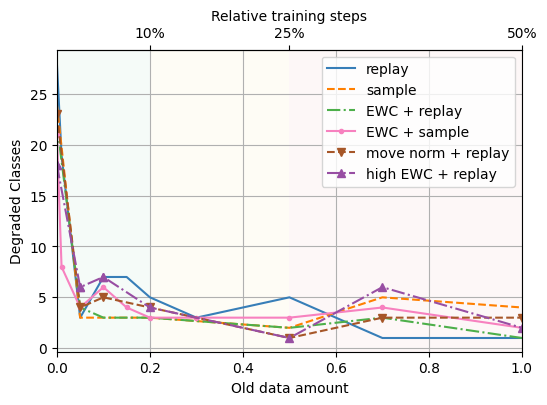

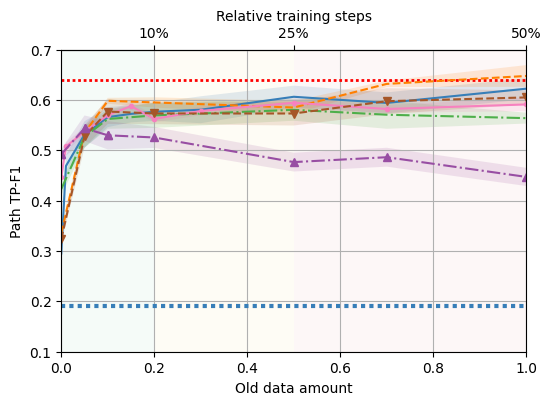

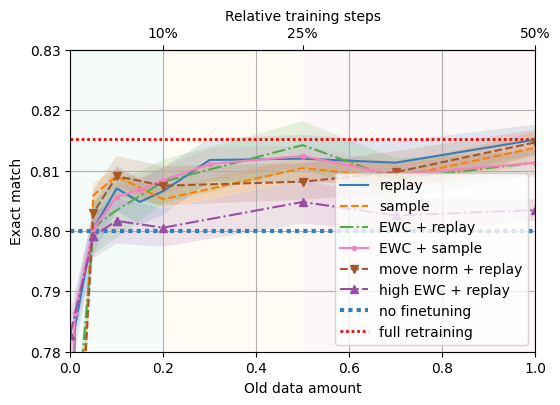

In [455]:
dataframe = pd.read_csv(StringIO(path_99_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)


_tag = '["finetune","path_99_Jan8_bert_run_ewc_find","ewc_0"]'
replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","path_99_Jan8_sample_fixed"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","path_99_Jan8_ewc_sample_fixed","ewc_100"]'
ewc_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","path_99_Jan8_ewc_replay","ewc_100"]'
ewc_replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","path_99_Jan8_ewc_replay","ewc_1000"]'
ewc_replay_high = dataframe[dataframe.tags == _tag]

_tag = '["finetune","path_99_Jan8_move_norm","move_norm_0.1"]'
move_norm_replay = dataframe[dataframe.tags == _tag]


dataframes = [replay, sample, ewc_replay, ewc_sample, move_norm_replay, ewc_replay_high]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay", "high EWC + replay"]


xticks = {0.2: '10%', 0.5: '25%', 1.0: '50%'}


plot(dataframes, labels, "n_negative_outliers", "Degraded Classes", legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "absolute_degradation_0.0", "Path 99 F1 Cumulative Degradation", legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "relative_degradation", "Path 99 Relative Degradation", ylim=(-0.0001, 0.001), legend_loc='upper right', xticks=xticks)


plot(dataframes, labels, "cls/eval_PATH_tree_path_f1", "Path TP-F1", ylim=(0.1, 0.7), initial=0.19, from_scratch=0.64, xticks=xticks, legend_loc=None)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=0.80, from_scratch=0.8153, ylim=(0.78, 0.83), xticks=xticks)

# SL:ORGANIZER_EVENT 95

In [456]:
organizer_95_csv = """
"Name","old_data_amount","cls/eval_ORGANIZER_EVENT_tree_path_f1","tags","dropout","_wandb","n_negative_outliers","absolute_degradation_0.0","eval_exact_match","relative_degradation","cls/eval_ORGANIZER_EVENT_tree_path_f1_std","eval_exact_match_std"
"northern-vortex-5291 (replay)","0.5","0.6965335914479265","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_0""]","0.2","","4","-1.3344","0.8146570825639673","-0.0003792825968020569","0.04673875748995853","0.0018308574913395584"
"solar-lake-5281 (replay)","0.2","0.7065343915343915","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_0""]","0.2","","5","-1.0266","0.8126399618143221","-0.0006207143206128332","0.04285874319306153","0.003537237940729222"
"floral-plasma-5276 (replay)","0.1","0.6348283030690979","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_0""]","0.2","","5","-1.5343","0.8151053246410672","-0.0003200283545701536","0.0667562711859689","0.002862381898097194"
"fiery-shadow-5270 (replay)","0.05","0.5505544740067777","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_0""]","0.2","","8","-1.5125","0.8119677557121504","-0.00125465529066314","0.04656441700927949","0.0020121775822213284"
"helpful-galaxy-5264 (replay)","0","0.230070774403064","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_0""]","0.2","","20","-2.9197","0.7776778334652247","-0.012691421252207746","0.0138986259217086","0.0031510712067595687"
"lively-planet-5287 (ewc 10)","0.5","0.686284407508828","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_10""]","0.2","","0","-0.6521","0.8191392207107058","0","0.045585082847321275","0.0025341938380117066"
"true-pine-5280 (ewc 10)","0.2","0.6483770341397459","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_10""]","0.2","","1","-0.5679","0.8135363831631308","-0.00012540079758872256","0.03425037245379261","0.0030853493488027873"
"silver-plant-5274 (ewc 10)","0.1","0.5873513311187011","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_10""]","0.2","","0","-0.7072","0.8173464094157843","0","0.06959775154440974","0.0032656160401408024"
"brisk-morning-5268 (ewc 10)","0.05","0.5533180044593088","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_10""]","0.2","","4","-1.5914","0.8128642084636546","-0.0002276987566727153","0.04934721888143462","0.0022665342586687394"
"dainty-eon-5262 (ewc 10)","0","0.3563479271263953","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_10""]","0.2","","18","-2.2863","0.7920213287108565","-0.007360776734997495","0.017415339629795402","0.002750342564567561"
"frosty-puddle-5294 (ewc 100)","0.5","0.7065343915343915","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_100""]","0.2","","0","-0.6799","0.8177946200901886","0","0.04285874319306153","0.0024394222759580694"
"fiery-tree-5283 (ewc 100)","0.2","0.6871273145065577","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_100""]","0.2","","0","-0.5322","0.8121917511399179","0","0.03664329869301647","0.002876507967650758"
"cosmic-shadow-5278 (ewc 100)","0.1","0.6300385366097793","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_100""]","0.2","","2","-0.7963","0.8115194508296593","-0.00014070531322146892","0.04851369988095683","0.003148790602203181"
"splendid-microwave-5272 (ewc 100)","0.05","0.6109912696505159","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_100""]","0.2","","1","-0.6906","0.8115194822323548","-0.000038373175432286326","0.04588798024780522","0.0021445124460090976"
"exalted-violet-5266 (ewc 100)","0","0.45260293790790246","[""finetune"",""organizer_95_Jan9_ewc_find"",""ewc_100""]","0.2","","20","-2.5114","0.7949347451985279","-0.006777018109977098","0.01532521709581578","0.002229573696395097"
"dutiful-eon-5316 (ewc 1000)","0.5","0.6260223078566948","[""finetune"",""organizer_95_Jan10_ewc_find"",""ewc_1000""]","0.2","","0","-0.5088","0.8112954239991961","0","0.06874980135928639","0.0030585057705919357"
"absurd-deluge-5314 (ewc 1000)","0.2","0.6162249595620256","[""finetune"",""organizer_95_Jan10_ewc_find"",""ewc_1000""]","0.2","","1","-0.7726","0.8097266395347378","-0.00014545419689840388","0.06615335303411067","0.002887316574809389"
"helpful-forest-5313 (ewc 1000)","0.1","0.6465131066019476","[""finetune"",""organizer_95_Jan10_ewc_find"",""ewc_1000""]","0.2","","2","-0.737","0.8079337654344249","-0.0004437082086316006","0.0700265725762923","0.002874567748234019"
"logical-darkness-5311 (ewc 1000)","0.05","0.5946064835795644","[""finetune"",""organizer_95_Jan10_ewc_find"",""ewc_1000""]","0.2","","7","-1.023","0.8059166446847797","-0.0012914857272016823","0.05479534515830518","0.0032335650625856366"
"fluent-pyramid-5310 (ewc 1000)","0","0.5231492164461611","[""finetune"",""organizer_95_Jan10_ewc_find"",""ewc_1000""]","0.2","","14","-2.0881","0.7976242604665185","-0.005833920215621691","0.02846224935442583","0.001973796487805606"
"dutiful-valley-5308 (dropout 0.4)","0.5","0.7040823765263349","[""finetune"",""organizer_95_Jan9_higher_dropout""]","0.4","","4","-1.1229","0.8130882666968132","-0.00037498559033990846","0.04858161452683775","0.002888038771805796"
"revived-durian-5307 (dropout 0.4)","0.2","0.6266004437273094","[""finetune"",""organizer_95_Jan9_higher_dropout""]","0.4","","5","-1.2474","0.8117436032709048","-0.0004937039129254902","0.03260828567217938","0.0037078911016215303"
"earnest-eon-5304 (dropout 0.4)","0.1","0.591381042626698","[""finetune"",""organizer_95_Jan9_higher_dropout""]","0.4","","10","-1.8391","0.8074852721357602","-0.000948409736562278","0.03759379074661889","0.003796823729111231"
"hopeful-bush-5300 (dropout 0.4)","0.05","0.569164534096041","[""finetune"",""organizer_95_Jan9_higher_dropout""]","0.4","","13","-2.0643","0.8092782404441596","-0.0020330054948240047","0.05296235618980941","0.00371900071482387"
"ancient-dew-5297 (dropout 0.4)","0","0.23039086480245555","[""finetune"",""organizer_95_Jan9_higher_dropout""]","0.4","","28","-2.9074","0.7779020173091659","-0.014936941336079304","0.015263160032696989","0.0022279905931259624"
"mild-wind-5325 (dropout 0.5)","0.5","0.6939195634976034","[""finetune"",""organizer_95_Jan10_higher_dropout""]","0.5","","18","-1.8406","0.8009859504339852","-0.005382425918605557","0.04121551941885065","0.0032738752909783485"
"sage-shape-5324 (dropout 0.5)","0.2","0.6669222141466347","[""finetune"",""organizer_95_Jan10_higher_dropout""]","0.5","","19","-1.7915","0.7978483186996772","-0.007438110101377999","0.04033431741555275","0.0028994884003821506"
"logical-cherry-5322 (dropout 0.5)","0.1","0.5441662685140946","[""finetune"",""organizer_95_Jan10_higher_dropout""]","0.5","","29","-2.4399","0.7879873070304354","-0.01102790674827168","0.05408721984962303","0.002450071870325066"
"apricot-firefly-5320 (dropout 0.5)","0.05","0.4713611719917581","[""finetune"",""organizer_95_Jan10_higher_dropout""]","0.5","","30","-3.2212","0.7868668274484681","-0.012198443325972634","0.03575850303951061","0.0023233130760672463"
"sage-terrain-5319 (dropout 0.5)","0","0.18417509814142435","[""finetune"",""organizer_95_Jan10_higher_dropout""]","0.5","","37","-4.2371","0.7640068897514162","-0.025002064336395055","0.010880865164156936","0.0022603731506034386"
"morning-sky-5584 (move norm)","0.5","0.7277764585576155","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.1""]","0.2","","2","-0.7282","0.8168980731305975","-0.00013663643169950084","0.04532073195663346","0.003206759645132463"
"eager-silence-5579 (move norm)","0.5","0.70706721849579","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.01""]","0.2","","1","-0.7198","0.8191391893080102","-0.00004615384615384615","0.054283220946834694","0.003741325797907829"
"winter-leaf-5576 (move norm)","0.2","0.6767787618191929","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.1""]","0.2","","0","-0.3581","0.8135366343846956","0","0.056072845864763673","0.0022078743721842963"
"happy-durian-5573 (move norm)","0.2","0.706165861860503","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.01""]","0.2","","1","-0.624","0.8124159035811633","-0.00009075320963865855","0.02865985283901787","0.0027226150485741628"
"flowing-brook-5571 (move norm)","0.1","0.5523449133452017","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.1""]","0.2","","1","-0.73","0.8117436346736003","-0.00017940522407084672","0.03838483060227548","0.0033598524501102347"
"lucky-lake-5568 (move norm)","0.1","0.5784654829519825","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.01""]","0.2","","2","-0.974","0.8108470877140095","-0.00026333242608028246","0.05639460642891469","0.003089577063693498"
"legendary-tree-5565 (move norm)","0.05","0.6158468691921322","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.1""]","0.2","","6","-0.9309","0.8092782718468554","-0.0009667203198674084","0.04470585536666608","0.003367412326616851"
"clear-surf-5562 (move norm)","0.05","0.5972534370572493","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.01""]","0.2","","3","-0.851","0.8099507919759832","-0.00032221625485996907","0.04826557501759222","0.003575664335048409"
"stoic-sun-5559 (move norm)","0","0.2186188742247556","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.1""]","0.2","","24","-3.1154","0.7765571654670838","-0.013794117192094384","0.017512234123552937","0.002697083403006124"
"radiant-microwave-5556 (move norm)","0","0.21326817981811724","[""finetune"",""organizer_95_Jan10_move_norm_fixed"",""move_norm_0.01""]","0.2","","26","-3.1011","0.774316049289671","-0.01484400577456469","0.014998082300418917","0.00282549477265163"
"restful-smoke-5333 (ewc 1000)","0.5","0.6260223078566948","[""finetune"",""organizer_95_Jan10_ewc_find_sample"",""ewc_1000""]","0.2","","0","-0.5088","0.8112954239991961","0","0.06874980135928639","0.0030585057705919357"
"laced-frog-5332 (ewc 1000)","0.2","0.6162249595620256","[""finetune"",""organizer_95_Jan10_ewc_find_sample"",""ewc_1000""]","0.2","","1","-0.7726","0.8097266395347378","-0.00014545419689840388","0.06615335303411067","0.002887316574809389"
"snowy-lion-5330 (ewc 1000)","0.1","0.6465131066019476","[""finetune"",""organizer_95_Jan10_ewc_find_sample"",""ewc_1000""]","0.2","","2","-0.737","0.8079337654344249","-0.0004437082086316006","0.0700265725762923","0.002874567748234019"
"rare-haze-5329 (ewc 1000)","0.05","0.5946064835795644","[""finetune"",""organizer_95_Jan10_ewc_find_sample"",""ewc_1000""]","0.2","","7","-1.023","0.8059166446847797","-0.0012914857272016823","0.05479534515830518","0.0032335650625856366"
"jumping-moon-5327 (ewc 1000)","0","0.5231492164461611","[""finetune"",""organizer_95_Jan10_ewc_find_sample"",""ewc_1000""]","0.2","","14","-2.0881","0.7976242604665185","-0.005833920215621691","0.02846224935442583","0.001973796487805606"
"fancy-fog-5507 (sample)","1","0.5766391663048197","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","0","-0.5099","0.8130881410860308","0","0.0503301390160726","0.0027403195553915194"
"azure-resonance-5503 (sample)","0.7","0.646671624115233","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","5","-0.5493","0.8119675358932812","-0.0009300903537023952","0.03200886237550146","0.0027080250420190304"
"desert-elevator-5500 (sample)","0.5","0.677960361778718","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","2","-0.9832","0.8164498624561933","-0.00021052561903605628","0.0608945277263694","0.0035175226879504253"
"fancy-sky-5497 (sample)","0.2","0.7355337394506312","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","1","-0.7175","0.8153294456796172","-0.00004615384615384615","0.018119004334726903","0.002545050019739982"
"warm-flower-5495 (sample)","0.1","0.5505953670742404","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","3","-0.6972","0.809502424288101","-0.0003157902571825902","0.060142134111953065","0.0025392431874285528"
"trim-cosmos-5493 (sample)","0.05","0.574690022403891","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","5","-1.2704","0.8115196078431373","-0.0004352788377057044","0.03873358136939476","0.00400092281173918"
"celestial-silence-5490 (sample)","0","0.20988078253086617","[""finetune"",""organizer_95_Jan10_sample_fixed"",""ewc_""]","0.2","","26","-3.1538","0.7731954440969213","-0.015393491571054184","0.01530313316269148","0.0028777575308383905"
"wise-gorge-5551 (ewc + sample)","1","0.7386098315138512","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","0","-0.3944","0.8175701536219868","0","0.0421766422045717","0.0031121425790811433"
"ruby-durian-5548 (ewc + sample)","1","0.6475290097629343","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","1","-0.9363","0.813760315785507","-0.00011372140261628244","0.043582679083903245","0.002786046659461602"
"sage-lake-5546 (ewc + sample)","0.7","0.7095126731272912","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","2","-0.3126","0.811967630101368","-0.00016645548967862396","0.02554731680219522","0.0025581757031451517"
"atomic-planet-5542 (ewc + sample)","0.7","0.6777994106733602","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","0","-0.2379","0.8124159349838591","0","0.04481956644974112","0.0023556516501334244"
"sparkling-terrain-5539 (ewc + sample)","0.5","0.6874347121804749","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","1","-0.6337","0.8151051362248936","-0.00004615384615384615","0.06357693075154104","0.0028963946107920463"
"easy-thunder-5536 (ewc + sample)","0.5","0.6569696485158589","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","1","-0.7244","0.8153294770823127","-0.00004615384615384615","0.07131755731356708","0.002148017912014222"
"kind-frost-5533 (ewc + sample)","0.2","0.6969792776739163","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","1","-0.2732","0.8148812664079085","-0.00008179804715408434","0.05288999873506474","0.002920641508967138"
"giddy-feather-5530 (ewc + sample)","0.2","0.6760073260073259","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","0","-0.3751","0.8115195764404417","0","0.03805118613885888","0.0028478172010140044"
"twilight-elevator-5527 (ewc + sample)","0.1","0.5831973904109152","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","1","-0.5683","0.8128640514501765","-0.00012160162863538632","0.05440321048155289","0.0025950138723996995"
"wild-galaxy-5524 (ewc + sample)","0.1","0.6391908936296499","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","0","-0.2542","0.8126400874251045","0","0.05639145775238741","0.0029599588639951"
"restful-wildflower-5522 (ewc + sample)","0.05","0.6104877949448202","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","1","-0.7337","0.8108471505194006","-0.00021542979717808667","0.04575910878695534","0.002929182378016026"
"stellar-pond-5519 (ewc + sample)","0.05","0.6166665582444271","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","8","-1.057","0.8086059401339011","-0.0013221030240234883","0.040450058659337984","0.0027108717288673373"
"rural-grass-5516 (ewc + sample)","0","0.26337186445325866","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_10""]","0.2","","23","-2.8358","0.7812636130685459","-0.011270767021428143","0.01749131358702904","0.002680319641461152"
"giddy-sun-5513 (ewc + sample)","0","0.42058912643071417","[""finetune"",""organizer_95_Jan10_ewc_sample_fixed"",""ewc_100""]","0.2","","19","-2.2976","0.7879870872115662","-0.008791430883679452","0.02476714272055829","0.0023787807163003502"
"""

In [457]:
dataframe.tags.unique()

array(['["finetune","path_99_Jan8_move_norm","move_norm_0.01"]',
       '["finetune","path_99_Jan8_move_norm","move_norm_0.1"]',
       '["finetune","path_99_Jan8_ewc_replay","ewc_100"]',
       '["finetune","path_99_Jan8_ewc_replay","ewc_1000"]',
       '["finetune","path_99_Jan8_ewc_replay","ewc_10"]',
       '["finetune","path_99_Jan8_ewc_replay","ewc_0.1"]',
       '["finetune","path_99_Jan8_sample_fixed"]',
       '["finetune","path_99_Jan8_ewc_replay","ewc_0"]',
       '["finetune","path_99_Jan8_ewc_sample_fixed","ewc_10"]',
       '["finetune","path_99_Jan8_ewc_sample_fixed","ewc_100"]',
       '["finetune","path_99_Jan8_bert_run_ewc_find","ewc_0"]'],
      dtype=object)

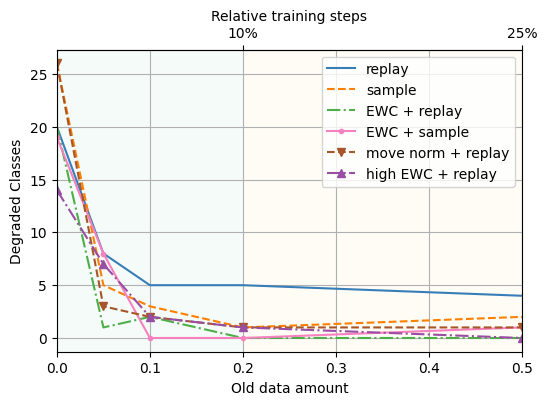

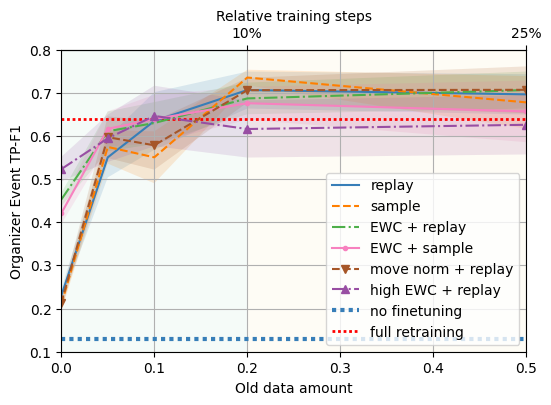

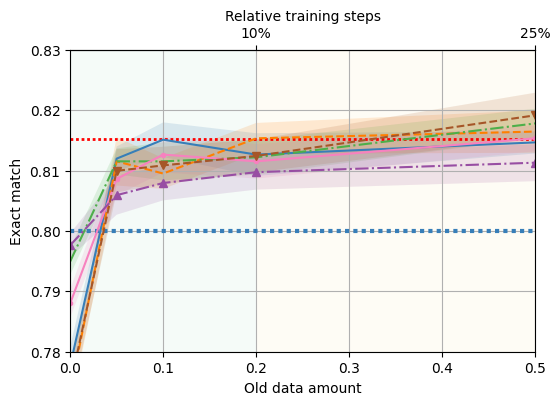

In [459]:
dataframe = pd.read_csv(StringIO(organizer_95_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)

_tag = '["finetune","organizer_95_Jan9_ewc_find","ewc_0"]'
replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","organizer_95_Jan10_sample_fixed","ewc_"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","organizer_95_Jan10_ewc_sample_fixed","ewc_100"]'
ewc_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","organizer_95_Jan9_ewc_find","ewc_100"]'
ewc_replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","organizer_95_Jan10_ewc_find_sample","ewc_1000"]'  # this is not sample, replay
ewc_replay1k = dataframe[dataframe.tags == _tag]

_tag = '["finetune","organizer_95_Jan10_move_norm_fixed","move_norm_0.01"]'
move_norm = dataframe[dataframe.tags == _tag]

dataframes = [replay, sample, ewc_replay, ewc_sample, move_norm, ewc_replay1k]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay", "high EWC + replay"]

xticks = {0.2: '10%', 0.5: '25%', 1.0: '50%'}


plot(dataframes, labels, "n_negative_outliers", "Degraded Classes", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "absolute_degradation_0.0", "Organizer 95 F1 Cumulative Degradation", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "relative_degradation", "Organizer 95 Relative Degradation", ylim=(-0.0001, 0.001), xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)

plot(dataframes, labels, "cls/eval_ORGANIZER_EVENT_tree_path_f1", "Organizer Event TP-F1", ylim=(0.1, 0.8), xlim=(0, 0.5), initial=0.13, from_scratch=0.64, xticks=xticks)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=0.80, from_scratch=0.8153, ylim=(0.78, 0.83), xlim=(0, 0.5), xticks=xticks, legend_loc=None)

# Get Weather 95

In [4]:
getweather_csv = '''
"Name","old_data_amount","cls/eval_GETWEATHER_tree_path_f1","dropout","tags","_wandb","cls/eval_GETWEATHER_tree_path_f1_std","n_negative_outliers","absolute_degradation_0.0","eval_exact_match_std","relative_degradation","eval_exact_match"
"quiet-elevator-5365 (replay)","1","0.9576364811366148","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.004613529308292447","2","-0.2666","0.0046014638309732426","-0.00033066881034750893","0.9314285714285712"
"usual-monkey-5362 (replay)","0.7","0.9620073701074852","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.005329982574312042","3","-0.3886","0.004601463830973243","-0.000484950598942484","0.9328571428571428"
"desert-sun-5359 (replay)","0.5","0.9662248128233346","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.005609196323363782","4","-0.2468","0.00524890659167822","-0.00046948252511985387","0.9385714285714286"
"silvery-cherry-5357 (replay)","0.2","0.957785858586934","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.0057249014058089465","1","-0.2093","0.003677010764638202","-0.00004733637457270502","0.9385714285714286"
"noble-paper-5353 (replay)","0.1","0.9662248128233346","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.005609196323363782","2","-0.3062","0.0031943828249996883","-0.00026103418163918204","0.9357142857142856"
"vague-lion-5350 (replay)","0.05","0.9661603192323852","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.007572217407672215","1","-0.1014","0.0041342274652822085","-0.00004733637457270502","0.9414285714285716"
"dulcet-bee-5348 (replay)","0","0.5876232757668893","0.2","[""finetune"",""snips_get_weather_95_Jan11_replay""]","","0.016568499845602446","39","-15.6407","0.00381324223286836","-0.12288012523313012","0.67"
"sleek-firefly-5413 (ewc + replay)","1","0.9618691542804554","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.00484742938723091","0","-0.1064","0.004432026302139576","0","0.9371428571428572"
"peach-darkness-5412 (ewc + replay)","1","0.9701518080269084","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.008111836866776584","1","-0.1324","0.0048707791774949315","-0.000048938820115860874","0.94"
"effortless-serenity-5410 (ewc + replay)","0.7","0.9619096522322992","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.00446163951364011","1","-0.283","0.0042257712736425675","-0.00009488713230566346","0.9357142857142856"
"dry-fog-5408 (ewc + replay)","0.7","0.9619224769769824","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.0052508362593148275","7","-0.3436","0.0038465462908103465","-0.0007188092149109585","0.9328571428571428"
"copper-energy-5406 (ewc + replay)","0.5","0.9599845693449904","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.005043108126732875","1","-0.073","0.003312006605534168","-0.00004942924416259978","0.9385714285714286"
"fast-oath-5403 (ewc + replay)","0.5","0.9536084411177784","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.003884859989336745","2","-0.2244","0.0049744243847085964","-0.0001903026783270744","0.9371428571428572"
"morning-blaze-5402 (ewc + replay)","0.2","0.9726397397239722","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.004336607320382398","1","-0.0996","0.004315373561998046","-0.00009488713230566346","0.94"
"giddy-glade-5399 (ewc + replay)","0.2","0.96830620133118","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.005065895302715794","1","-0.1418","0.003677010764638202","-0.00004733637457270502","0.9399999999999998"
"youthful-cosmos-5393 (ewc + replay)","0.1","0.964020349579338","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.005066248510489833","2","-0.1558","0.004315373561998046","-0.00014474948447365182","0.9328571428571428"
"lunar-pyramid-5391 (ewc + replay)","0.1","0.9598711593809752","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.004228279789560044","1","-0.2073","0.003745745886321956","-0.00004733637457270502","0.9357142857142856"
"bright-hill-5390 (ewc + replay)","0.05","0.9640845099803406","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.0033070197048298","1","-0.1768","0.0031134992453861845","-0.00015216358132829114","0.9314285714285712"
"wild-butterfly-5388 (ewc + replay)","0.05","0.9534310281995252","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.005904938899595347","4","-0.3355","0.0040089186286863514","-0.0004160175545965899","0.9314285714285716"
"royal-breeze-5386 (ewc + replay)","0","0.6511938220020419","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_100""]","","0.01309215123292813","29","-9.0933","0.005224549585117087","-0.06934465589332019","0.8300000000000001"
"fragrant-puddle-5385 (ewc + replay)","0","0.7466333904555225","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_replay"",""ewc_10""]","","0.020383473653272276","31","-5.9458","0.003813242232868312","-0.044946782990146074","0.8442857142857143"
"legendary-snow-5448 (move norm)","1","0.9577990372699128","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.005007020992482722","1","-0.2163","0.004999999999999982","-0.000048938820115860874","0.9328571428571428"
"daily-river-5445 (move norm)","1","0.9617327906440916","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.007411398560103948","1","-0.1653","0.005824823725107155","-0.000048938820115860874","0.9385714285714286"
"gentle-water-5444 (move norm)","0.7","0.9535480163315312","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.004558372390813181","3","-0.2971","0.004072055089639764","-0.00028163524292505916","0.9357142857142856"
"azure-glade-5442 (move norm)","0.7","0.9703573624086812","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.006370317282771968","3","-0.1879","0.004573660169594876","-0.00018967940043811303","0.9442857142857144"
"hardy-eon-5440 (move norm)","0.5","0.957785858586934","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.0057249014058089465","3","-0.2201","0.005345224838248469","-0.0002640839114306106","0.9342857142857144"
"firm-totem-5439 (move norm)","0.5","0.9683430436384294","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.004805957705898241","1","-0.15","0.003642156795423405","-0.00004733637457270502","0.9414285714285716"
"clear-lake-5437 (move norm)","0.2","0.9642171050295308","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.00626772319814988","1","-0.072","0.004432026302139576","-0.00004733637457270502","0.9414285714285716"
"daily-star-5435 (move norm)","0.2","0.96830620133118","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.005065895302715794","3","-0.1861","0.002766416675862431","-0.0002937838050387905","0.9357142857142856"
"graceful-firebrand-5429 (move norm)","0.1","0.9598711593809752","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.004228279789560044","1","-0.1065","0.003813242232868312","-0.00008273332988350351","0.9342857142857142"
"lilac-music-5428 (move norm)","0.1","0.9641570111328172","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.004487005174098383","2","-0.326","0.0031943828249996883","-0.00026103418163918204","0.9357142857142856"
"breezy-frog-5427 (move norm)","0.05","0.9520510266282524","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.008121916546709327","1","-0.1453","0.004573660169594876","-0.00020099458312282408","0.9342857142857144"
"kind-grass-5426 (move norm)","0.05","0.9620073701074852","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.005329982574312042","3","-0.223","0.0031134992453861845","-0.0004621168033608487","0.9314285714285712"
"deft-oath-5425 (move norm)","0","0.593714283017919","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.01608970093129377","33","-12.0597","0.004374088826398553","-0.0942805214849287","0.7928571428571429"
"unique-violet-5424 (move norm)","0","0.5945269171682248","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.01648770149333591","34","-12.5854","0.006018678409411704","-0.09587656677385371","0.7871428571428571"
"rose-field-5618 (sample)","1","0.9661392305768476","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.004605821831728801","2","-0.1532","0.0049744243847085964","-0.00009370993866833404","0.9342857142857144"
"proud-bee-5609 (sample)","0.7","0.9578244206142368","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.007363387656022018","2","-0.2475","0.006144518047887569","-0.0001497328057668826","0.9314285714285716"
"unique-gorge-5606 (sample)","0.5","0.9620450679679526","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.007698545836782169","2","-0.3393","0.006226998490772369","-0.0001497328057668826","0.9342857142857142"
"pleasant-spaceship-5603 (sample)","0.2","0.966281414730324","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.007869906021490309","0","-0.1623","0.004315373561998046","0","0.9385714285714286"
"soft-jazz-5599 (sample)","0.1","0.9683470818216204","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.00691004587401086","0","-0.0195","0.005714285714285694","0","0.9399999999999998"
"eager-valley-5595 (sample)","0.05","0.964215703561791","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.005077137338494389","4","-0.3297","0.004432026302139576","-0.0003039559031397904","0.93"
"unique-dew-5594 (sample)","0","0.5743481607868144","0.2","[""finetune"",""snips_get_weather_95_Jan11_sample""]","","0.01911832708072716","38","-14.7242","0.007609741340236625","-0.11640447154187072","0.7057142857142857"
"glorious-wind-5645 (ewc + sample)","1","0.9597475572404548","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.005929364362211536","0","-0.1685","0.005802884574739951","0","0.9371428571428572"
"sparkling-blaze-5640 (ewc + sample)","0.7","0.9598075945817778","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.0068615043221315454","0","-0.1181","0.005463235193135107","0","0.9342857142857144"
"cerulean-elevator-5635 (ewc + sample)","0.5","0.9598948839979536","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.004323566072668191","0","-0.1385","0.004072055089639764","0","0.9357142857142856"
"classic-yogurt-5632 (ewc + sample)","0.2","0.9621157577734746","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.005217326363869499","1","-0.2471","0.003745745886321956","-0.000047810067812206545","0.9357142857142856"
"pretty-terrain-5630 (ewc + sample)","0.1","0.9579142575758428","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.004199573698784209","2","-0.2721","0.0038465462908103465","-0.00014486860600356825","0.9314285714285712"
"rare-wind-5627 (ewc + sample)","0.05","0.9622667927620862","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.008326742011026567","2","-0.2716","0.006144518047887569","-0.00014654364213176438","0.9328571428571428"
"chocolate-feather-5623 (ewc + sample)","0","0.8458306519085573","0.2","[""finetune"",""snips_get_weather_95_Jan11_ewc_sample"",""ewc_100""]","","0.01845894203338976","22","-2.9949","0.006328587552381927","-0.023819482884657416","0.8699999999999999"
"legendary-snow-5448 (Run set 6)","1","0.9577990372699128","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.005007020992482722","1","-0.2163","0.004999999999999982","-0.000048938820115860874","0.9328571428571428"
"daily-river-5445 (Run set 6)","1","0.9617327906440916","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.007411398560103948","1","-0.1653","0.005824823725107155","-0.000048938820115860874","0.9385714285714286"
"gentle-water-5444 (Run set 6)","0.7","0.9535480163315312","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.004558372390813181","3","-0.2971","0.004072055089639764","-0.00028163524292505916","0.9357142857142856"
"azure-glade-5442 (Run set 6)","0.7","0.9703573624086812","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.006370317282771968","3","-0.1879","0.004573660169594876","-0.00018967940043811303","0.9442857142857144"
"hardy-eon-5440 (Run set 6)","0.5","0.957785858586934","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.0057249014058089465","3","-0.2201","0.005345224838248469","-0.0002640839114306106","0.9342857142857144"
"firm-totem-5439 (Run set 6)","0.5","0.9683430436384294","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.004805957705898241","1","-0.15","0.003642156795423405","-0.00004733637457270502","0.9414285714285716"
"clear-lake-5437 (Run set 6)","0.2","0.9642171050295308","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.00626772319814988","1","-0.072","0.004432026302139576","-0.00004733637457270502","0.9414285714285716"
"daily-star-5435 (Run set 6)","0.2","0.96830620133118","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.005065895302715794","3","-0.1861","0.002766416675862431","-0.0002937838050387905","0.9357142857142856"
"amber-planet-5433 (Run set 6)","0.15","0.96210665132108","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.005423004519542071","1","-0.0912","0.0033120066055341685","-0.00004733637457270502","0.9385714285714286"
"noble-smoke-5432 (Run set 6)","0.15","0.9578542351004756","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.007975695114878811","2","-0.1643","0.004315373561998046","-0.00016520366675570658","0.9385714285714286"
"graceful-firebrand-5429 (Run set 6)","0.1","0.9598711593809752","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.004228279789560044","1","-0.1065","0.003813242232868312","-0.00008273332988350351","0.9342857142857142"
"lilac-music-5428 (Run set 6)","0.1","0.9641570111328172","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.004487005174098383","2","-0.326","0.0031943828249996883","-0.00026103418163918204","0.9357142857142856"
"breezy-frog-5427 (Run set 6)","0.05","0.9520510266282524","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.008121916546709327","1","-0.1453","0.004573660169594876","-0.00020099458312282408","0.9342857142857144"
"kind-grass-5426 (Run set 6)","0.05","0.9620073701074852","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.005329982574312042","3","-0.223","0.0031134992453861845","-0.0004621168033608487","0.9314285714285712"
"deft-oath-5425 (Run set 6)","0","0.593714283017919","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.1""]","","0.01608970093129377","33","-12.0597","0.004374088826398553","-0.0942805214849287","0.7928571428571429"
"unique-violet-5424 (Run set 6)","0","0.5945269171682248","0.2","[""finetune"",""snips_get_weather_95_Jan11_move_norm"",""move_norm_0.05""]","","0.01648770149333591","34","-12.5854","0.006018678409411704","-0.09587656677385371","0.7871428571428571"
'''

In [5]:
dataframe.tags.unique()

NameError: name 'dataframe' is not defined

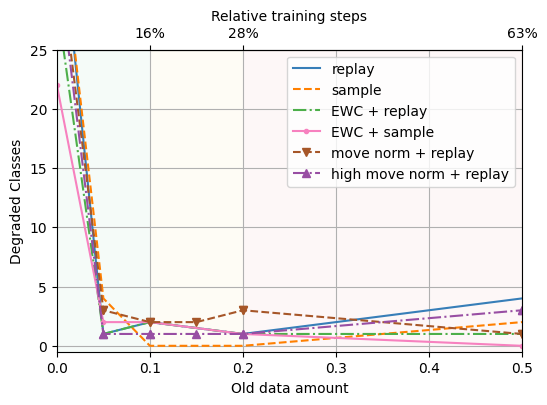

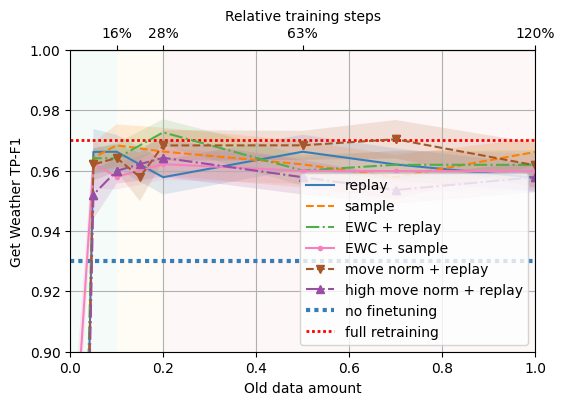

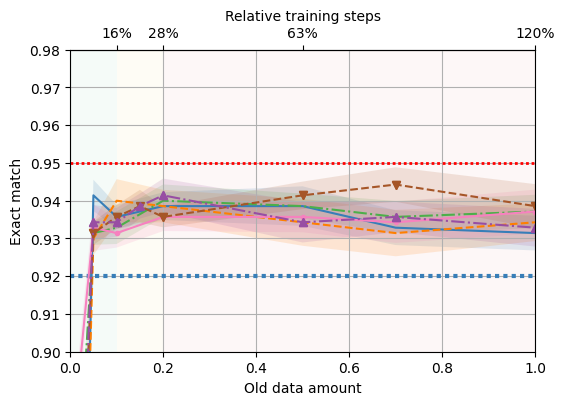

In [6]:
f1_initial = 0.93
f1_from_scratch = 0.97
em_initial = 0.92
em_from_scratch = 0.95
xlim = (0., 1.)

dataframe = pd.read_csv(StringIO(getweather_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)

_tag = '["finetune","snips_get_weather_95_Jan11_replay"]'
replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","snips_get_weather_95_Jan11_sample"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","snips_get_weather_95_Jan11_ewc_sample","ewc_100"]'
ewc_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","snips_get_weather_95_Jan11_ewc_replay","ewc_100"]'
ewc_replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","snips_get_weather_95_Jan11_move_norm","move_norm_0.05"]'
move_norm = dataframe[dataframe.tags == _tag]

_tag = '["finetune","snips_get_weather_95_Jan11_move_norm","move_norm_0.1"]'
move_norm_high = dataframe[dataframe.tags == _tag]


dataframes = [replay, sample, ewc_replay, ewc_sample, move_norm, move_norm_high]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay", "high move norm + replay"]


xticks = {0.1: '16%', 0.2: '28%', 0.5: '63%', 1.0: '120%'}


plot(dataframes, labels, "n_negative_outliers", "Degraded Classes", xlim=(0, 0.5), ylim=(-0.5, 25), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "absolute_degradation_0.0", "Organizer 95 F1 Cumulative Degradation", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "relative_degradation", "Organizer 95 Relative Degradation", ylim=(-0.0001, 0.001), xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)

plot(dataframes, labels, "cls/eval_GETWEATHER_tree_path_f1", "Get Weather TP-F1", ylim=(0.9, 1.0), xlim=xlim, initial=f1_initial, from_scratch=f1_from_scratch, xticks=xticks)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=em_initial, from_scratch=em_from_scratch, ylim=(0.9, 0.98), xlim=xlim, xticks=xticks, legend_loc=None)

# Served Dish

In [480]:
getweather_csv = '''
"Name","old_data_amount","cls/eval_SERVED_DISH_tree_path_f1","dropout","tags","_wandb","absolute_degradation_0.0","relative_degradation","eval_exact_match_std","eval_exact_match","n_negative_outliers","cls/eval_SERVED_DISH_tree_path_f1_std"
"generous-sound-5616 (replay)","1","0.9684077961019492","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.0748","0","0.005578749768504733","0.9342857142857142","0","0.016056668861595003"
"unique-silence-5611 (replay)","0.7","0.9707335722819594","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.1634","-0.0003344114758740632","0.004072055089639764","0.9357142857142856","4","0.014842156139968102"
"decent-blaze-5608 (replay)","0.5","0.9707335722819594","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.0533","-0.00004728984815874323","0.004573660169594876","0.9414285714285716","1","0.014842156139968102"
"atomic-glitter-5605 (replay)","0.2","0.9408966909668172","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.1115","-0.00009701621575404846","0.00338815463589468","0.9357142857142856","1","0.017811106631401886"
"cosmic-river-5604 (replay)","0.1","0.94172661074835","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.1323","-0.0002616382710777334","0.0020824828195875997","0.93","3","0.015547426706650233"
"worldly-paper-5600 (replay)","0.05","0.8635527912947266","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-0.3385","-0.000367120959903979","0.003571428571428603","0.9214285714285716","3","0.02467552328572722"
"treasured-fog-5598 (replay)","0","0.7427115583075335","0.2","[""finetune"",""served_dish_90_Jan14_replay""]","","-1.4897","-0.0040141770990982885","0.0048707791774949315","0.9028571428571428","11","0.05040750838681623"
"dauntless-tree-5658 (ewc + replay)","1","0.9684077961019492","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.169","-0.00010750288936729436","0.00346262846958308","0.93","1","0.016056668861595003"
"worldly-dragon-5655 (ewc + replay)","0.7","0.9376841676841676","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.2685","-0.0000966625438837742","0.003912303982179795","0.9214285714285716","1","0.017487422192855193"
"misty-grass-5652 (ewc + replay)","0.5","0.9376841676841676","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.0571","0","0.00262445329583911","0.93","0","0.017487422192855193"
"magic-brook-5649 (ewc + replay)","0.2","0.9408966909668172","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.0914","0","0.0029014422873699756","0.9314285714285712","0","0.017811106631401886"
"dark-flower-5647 (ewc + replay)","0.1","0.9140694076038904","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.2893","-0.00017231489688776495","0.0030722590239438256","0.927142857142857","1","0.01581525983154128"
"wild-leaf-5644 (ewc + replay)","0.05","0.8635527912947266","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.477","-0.0002718187792226253","0.0026726124191242344","0.917142857142857","2","0.02467552328572722"
"chocolate-feather-5642 (ewc + replay)","0","0.8409155985626573","0.2","[""finetune"",""served_dish_90_Jan14_ewc_replay"",""ewc_100""]","","-0.6649","-0.0007531017079094837","0.004573660169594876","0.9128571428571428","5","0.03890710345429905"
"dulcet-meadow-5687 (move norm)","0.7","0.8107002801120446","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","","","0.0028571428571428853","0.92","","0.0564400121749052"
"dry-shadow-5686 (move norm)","0.5","0.9707335722819594","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.1""]","","-0.0058","0","0.0029880715233359736","0.9357142857142856","0","0.014842156139968102"
"wobbly-resonance-5684 (move norm)","0.5","0.9707335722819594","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","-0.0987","-0.0000966625438837742","0.004999999999999982","0.9328571428571428","1","0.014842156139968102"
"absurd-brook-5682 (move norm)","0.2","0.9408966909668172","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.1""]","","-0.0913","-0.00047870120385441344","0.003113499245386215","0.9257142857142856","2","0.017811106631401886"
"glorious-snowball-5681 (move norm)","0.2","0.9408966909668172","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","-0.1204","0","0.0035714285714285587","0.9285714285714284","0","0.017811106631401886"
"generous-lion-5680 (move norm)","0.1","0.8882396377568792","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.1""]","","-0.2706","-0.000361881965566971","0.0030722590239438256","0.9271428571428572","2","0.0144053638295432"
"fancy-dew-5679 (move norm)","0.1","0.913635741652983","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","-0.3877","-0.0004134968002464392","0.00225876975726312","0.9285714285714286","2","0.018471786339171"
"charmed-dew-5678 (move norm)","0.05","0.8635527912947266","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.1""]","","-0.4852","-0.0005465160561519426","0.003312006605534168","0.917142857142857","6","0.02467552328572722"
"divine-cloud-5676 (move norm)","0.05","0.8635527912947266","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","-0.3022","-0.000367120959903979","0.0028571428571428858","0.9228571428571428","3","0.02467552328572722"
"visionary-dawn-5675 (move norm)","0","0.7427115583075335","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.1""]","","-1.3791","-0.003233898764054856","0.005463235193135107","0.9057142857142856","10","0.05040750838681623"
"upbeat-vortex-5674 (move norm)","0","0.7427115583075335","0.2","[""finetune"",""served_dish_90_Jan14_move_norm"",""move_norm_0.05""]","","-1.49","-0.004117492879712057","0.005486532677048986","0.9028571428571428","13","0.05040750838681623"
"stoic-totem-5638 (sample)","1","0.9684077961019492","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.0748","0","0.005578749768504733","0.9342857142857142","0","0.016056668861595003"
"valiant-glitter-5634 (sample)","0.7","0.968489533011272","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.1562","-0.00038705990440514456","0.00608192370211655","0.9357142857142856","5","0.015932957942385518"
"fragrant-dream-5631 (sample)","0.5","0.968489533011272","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.0509","-0.00005064034347363396","0.004974424384708596","0.9414285714285716","1","0.015932957942385518"
"divine-dragon-5628 (sample)","0.2","0.9398039833523704","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.1004","-0.00010362422325056572","0.007742672638813871","0.9357142857142856","1","0.021251671753938408"
"bright-spaceship-5626 (sample)","0.1","0.9398039833523706","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.1325","-0.00015372887610565867","0.00580288457473999","0.93","2","0.021251671753938408"
"smart-voice-5622 (sample)","0.05","0.8635714822327397","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-0.3446","-0.00036945729308409205","0.005532833351724905","0.9214285714285716","3","0.03521445320043555"
"copper-smoke-5620 (sample)","0","0.7427115583075335","0.2","[""finetune"",""served_dish_90_Jan14_sample""]","","-1.4897","-0.0040141770990982885","0.0048707791774949315","0.9028571428571428","11","0.05040750838681623"
"visionary-surf-5673 (ewc + sample)","1","0.9684077961019492","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.169","-0.00010750288936729436","0.00346262846958308","0.93","1","0.016056668861595003"
"graceful-meadow-5671 (ewc + sample)","0.7","0.9361523993248132","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.2644","-0.00018273335161016248","0.006487822187351794","0.9214285714285716","2","0.02238420165539394"
"crisp-mountain-5669 (ewc + sample)","0.5","0.9361523993248132","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.0542","0","0.006527023886606107","0.93","0","0.02238420165539394"
"astral-wildflower-5668 (ewc + sample)","0.2","0.9398039833523704","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.0916","0","0.0066432411563351135","0.9314285714285716","0","0.021251671753938408"
"smooth-pond-5665 (ewc + sample)","0.1","0.9127063492063492","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.2719","0","0.005463235193135145","0.9271428571428572","0","0.02347382925975006"
"clean-voice-5663 (ewc + sample)","0.05","0.8635714822327397","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.47","-0.0002716443464564087","0.006247448458762821","0.917142857142857","2","0.03521445320043555"
"revived-haze-5661 (ewc + sample)","0","0.8409155985626573","0.2","[""finetune"",""served_dish_90_Jan14_ewc_sample"",""ewc_100""]","","-0.6649","-0.0007531017079094837","0.004573660169594876","0.9128571428571428","5","0.03890710345429905"
'''

In [481]:
dataframe.tags.unique()

array(['["finetune","snips_get_weather_95_Jan11_move_norm","move_norm_0.05"]',
       '["finetune","snips_get_weather_95_Jan11_ewc_sample","ewc_100"]',
       '["finetune","snips_get_weather_95_Jan11_sample"]',
       '["finetune","snips_get_weather_95_Jan11_replay"]',
       '["finetune","snips_get_weather_95_Jan11_move_norm","move_norm_0.1"]',
       '["finetune","snips_get_weather_95_Jan11_ewc_replay","ewc_10"]',
       '["finetune","snips_get_weather_95_Jan11_ewc_replay","ewc_100"]'],
      dtype=object)

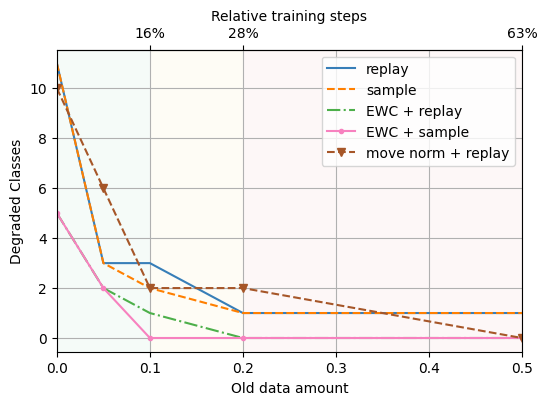

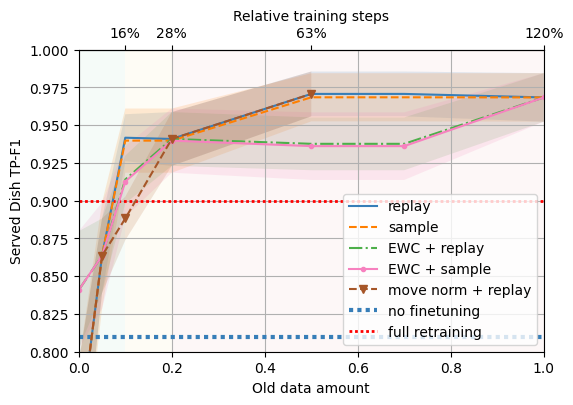

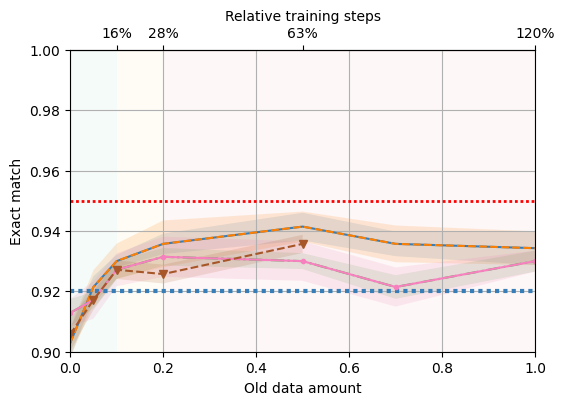

In [483]:
f1_initial = 0.81
f1_from_scratch = 0.90
em_initial = 0.92
em_from_scratch = 0.95
xlim = (0., 1.)

dataframe = pd.read_csv(StringIO(getweather_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)

_tag = '["finetune","served_dish_90_Jan14_replay"]'
replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","served_dish_90_Jan14_sample"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","served_dish_90_Jan14_ewc_sample","ewc_100"]'
ewc_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","served_dish_90_Jan14_ewc_replay","ewc_100"]'
ewc_replay = dataframe[dataframe.tags == _tag]

_tag =  '["finetune","served_dish_90_Jan14_move_norm","move_norm_0.1"]'
move_norm = dataframe[dataframe.tags == _tag]


dataframes = [replay, sample, ewc_replay, ewc_sample, move_norm]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay"]


xticks = {0.1: '16%', 0.2: '28%', 0.5: '63%', 1.0: '120%'}


plot(dataframes, labels, "n_negative_outliers", "Degraded Classes", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "absolute_degradation_0.0", "Organizer 95 F1 Cumulative Degradation", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "relative_degradation", "Organizer 95 Relative Degradation", ylim=(-0.0001, 0.001), xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)

plot(dataframes, labels, "cls/eval_SERVED_DISH_tree_path_f1", "Served Dish TP-F1", ylim=(0.8, 1.0), xlim=xlim, initial=f1_initial, from_scratch=f1_from_scratch, xticks=xticks)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=em_initial, from_scratch=em_from_scratch, ylim=(0.9, 1.0), xlim=xlim, xticks=xticks, legend_loc=None)

# Get Location School

In [460]:
school_csv = '''
"Name","old_data_amount","cls/eval_GET_LOCATION_SCHOOL_tree_path_f1","dropout","tags","_wandb","absolute_degradation_0.0","eval_exact_match_std","eval_exact_match","cls/eval_GET_LOCATION_SCHOOL_tree_path_f1_std","n_negative_outliers","relative_degradation"
"hearty-elevator-5690 (replay)","0.2","0.7857142857142858","0.2","[""finetune"",""school_95_Jan14_replay""]","","-1.0839","0.0037389712071324113","0.8151050420168067","0.10832679205787928","4","-0.00019786172257529327"
"confused-terrain-5688 (replay)","0.1","0.7857142857142858","0.2","[""finetune"",""school_95_Jan14_replay""]","","-1.2531","0.003437277336805111","0.8135362889550439","0.10832679205787928","8","-0.00033702376173035646"
"kind-glade-5685 (replay)","0.05","0.7857142857142858","0.2","[""finetune"",""school_95_Jan14_replay""]","","-0.6899","0.0041560588489223125","0.8090540880029142","0.10832679205787928","3","-0.00018752047907970407"
"splendid-valley-5683 (replay)","0","0.28592007026789634","0.2","[""finetune"",""school_95_Jan14_replay""]","","-2.3892","0.0019756257011712135","0.7895560286895027","0.03823210472915298","25","-0.013179540890660353"
"eternal-pine-5636 (ewc + replay)","1","0.5432600732600733","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.2172","0.0017625456354249942","0.8166740148974387","0.11902543608483984","0","0"
"atomic-elevator-5624 (ewc + replay)","0.7","0.5340259740259741","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.4603","0.003266150156665724","0.818018709726043","0.16223768349874815","3","-0.00030084225009399635"
"decent-cloud-5615 (ewc + replay)","0.5","0.5045021645021645","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.4905","0.003437639757101521","0.8160017773925713","0.1307994455960545","2","-0.00003446680840187449"
"silvery-wave-5607 (ewc + replay)","0.2","0.7857142857142858","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.5286","0.0033573645660735737","0.8184669518031427","0.10832679205787928","2","-0.00024169135426746737"
"lilac-moon-5601 (ewc + replay)","0.1","0.7857142857142858","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.3108","0.0038883983483942","0.8175705618570298","0.10832679205787928","0","0"
"playful-breeze-5596 (ewc + replay)","0.05","0.7431588019823314","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-0.2423","0.0036887026278722857","0.8162257728203389","0.09147054122801536","0","0"
"hopeful-sun-5590 (ewc + replay)","0","0.6165376652333174","0.2","[""finetune"",""school_95_Jan14_ewc_replay"",""ewc_100""]","","-1.3055","0.002530734632175953","0.8023303626383289","0.08075638270672837","17","-0.006778057513676927"
"fearful-whisper-4414 (move norm)","1","0.6619047619047619","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0034853450942420893","0.821828767381392","0.1227057021592869","0","0"
"crawly-wand-4413 (move norm)","0.7","0.5667801479566186","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.002487589211966576","0.8227252515355918","0.13050308565909835","3","-0.00018911601692482425"
"paranormal-ghoul-4412 (move norm)","0.5","0.6467334110677764","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0031120520050501236","0.8218289872002613","0.1349174123150517","2","-0.0000613367026639911"
"ominous-witch-4410 (move norm)","0.2","0.586999852572608","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0034871778921898586","0.8186915124794313","0.12730825894576403","2","-0.0003997207016860381"
"phantom-goosebump-4408 (move norm)","0.1","0.48795652173913046","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0026351919403476095","0.8168984499629449","0.07688053236736102","1","-0.000015182856510144952"
"mystical-phantasm-4407 (move norm)","0.05","0.4672193961196519","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0023108611785867344","0.8162261496526861","0.06809201531401499","1","-0.00007692307692307693"
"dark-monster-4405 (move norm)","0","0.39377955377955376","0.2","[""finetune"",""school_95_Oct27_bert_run_move_norm""]","","","0.0025038672379818026","0.8130882666968132","0.1183311525009864","4","-0.0005160292978546365"
"radiant-forest-5677 (ewc + sample)","1","0.5432600732600733","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.2172","0.0017625456354249942","0.8166740148974387","0.11902543608483984","0","0"
"crimson-field-5672 (ewc + sample)","0.7","0.48948384948384954","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.4708","0.0033250758116113092","0.818019023752999","0.25322981927430466","3","-0.0002951497728450749"
"drawn-tree-5667 (ewc + sample)","0.5","0.4833333333333333","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.4945","0.0036711878212954056","0.8160018716006583","0.1407785285628046","1","-0.000015336629943783003"
"dulcet-dream-5662 (ewc + sample)","0.2","0.7684126984126984","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.5301","0.002667337104224272","0.8184670774139253","0.13065372388735677","1","-0.000020334732595540528"
"glorious-frost-5657 (ewc + sample)","0.1","0.7684126984126984","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.3322","0.003029254904385669","0.8175705932597254","0.13065372388735677","0","0"
"dutiful-waterfall-5654 (ewc + sample)","0.05","0.7309691340651093","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-0.2618","0.0027881310474164095","0.8162259298338169","0.1493933834575045","0","0"
"toasty-sky-5650 (ewc + sample)","0","0.6165376652333174","0.2","[""finetune"",""school_95_Jan14_ewc_sample"",""ewc_100""]","","-1.3055","0.002530734632175953","0.8023303626383289","0.08075638270672837","17","-0.006778057513676927"
'''

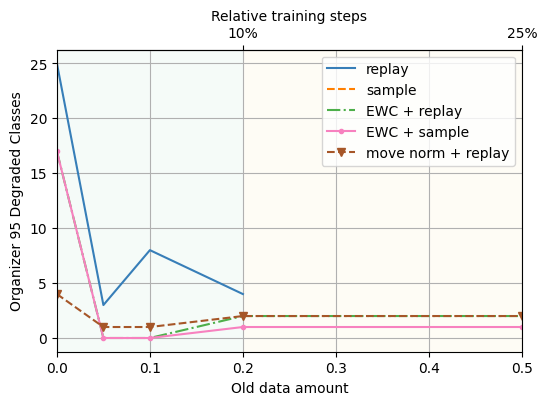

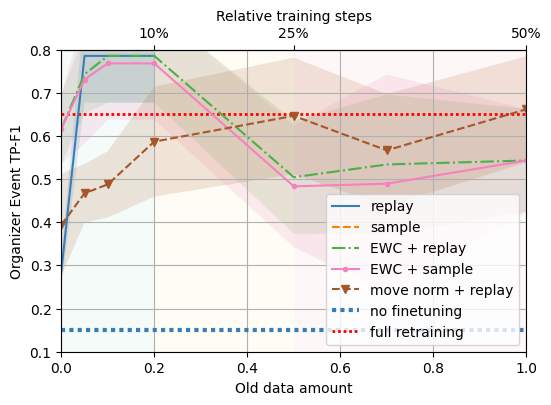

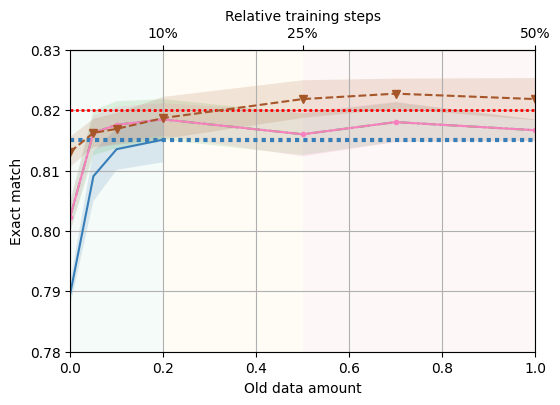

In [462]:
f1_initial = 0.15
f1_from_scratch = 0.65
em_initial = 0.815
em_from_scratch = 0.82
xlim = (0., 1.)

dataframe = pd.read_csv(StringIO(school_csv)).sort_values("old_data_amount")
dataframes, labels = split_dataframe_by_tag(dataframe)

_tag = '["finetune","school_95_Jan14_replay"]'
replay = dataframe[dataframe.tags == _tag]

_tag = None # '["finetune","served_dish_90_Jan14_sample"]'
sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","school_95_Jan14_ewc_sample","ewc_100"]'
ewc_sample = dataframe[dataframe.tags == _tag]

_tag = '["finetune","school_95_Jan14_ewc_replay","ewc_100"]'
ewc_replay = dataframe[dataframe.tags == _tag]

_tag = '["finetune","school_95_Oct27_bert_run_move_norm"]'
move_norm = dataframe[dataframe.tags == _tag]

# _tag = '["finetune","snips_get_weather_95_Jan11_move_norm","move_norm_0.1"]'
# move_norm_high = dataframe[dataframe.tags == _tag]


dataframes = [replay, sample, ewc_replay, ewc_sample, move_norm]
labels = ["replay", "sample", "EWC + replay", "EWC + sample", "move norm + replay"]

xticks = {0.2: '10%', 0.5: '25%', 1.0: '50%'}


plot(dataframes, labels, "n_negative_outliers", "Organizer 95 Degraded Classes", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "absolute_degradation_0.0", "Organizer 95 F1 Cumulative Degradation", xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)
# plot(dataframes, labels, "relative_degradation", "Organizer 95 Relative Degradation", ylim=(-0.0001, 0.001), xlim=(0, 0.5), legend_loc='upper right', xticks=xticks)

plot(dataframes, labels, "cls/eval_GET_LOCATION_SCHOOL_tree_path_f1", "Organizer Event TP-F1", ylim=(0.1, 0.8), xlim=xlim, initial=f1_initial, from_scratch=f1_from_scratch, xticks=xticks)
plot(dataframes, labels, "eval_exact_match", "Exact match", initial=em_initial, from_scratch=em_from_scratch, ylim=(0.78, 0.83), xlim=xlim, xticks=xticks, legend_loc=None)